In [ ]:
!unzip archive.zip

Archive:  archive.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
import numpy as np
import pandas as pd
import re
import nltk

In [ ]:
!pip install pyspellchecker

Preprocessing

In [ ]:
df = pd.read_csv('/content/training.1600000.processed.noemoticon.csv',encoding="ISO-8859-1",names=['target','id','date','flag','user','text'])
df.head()

,target,id,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df.shape[0]

1600000

In [ ]:
df.tail()

,target,id,date,flag,user,text
1599995,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...
1599999,4,2193602129,Tue Jun 16 08:40:50 PDT 2009,NO_QUERY,RyanTrevMorris,happy #charitytuesday @theNSPCC @SparksCharity...


In [ ]:
df.describe()

,target,id
count,1.600000e+06,1.600000e+06
mean,2.000000e+00,1.998818e+09
std,2.000001e+00,1.935761e+08
min,0.000000e+00,1.467810e+09
25%,0.000000e+00,1.956916e+09
50%,2.000000e+00,2.002102e+09
75%,4.000000e+00,2.177059e+09
max,4.000000e+00,2.329206e+09


In [ ]:
df.isnull().sum()

target    0
id        0
date      0
flag      0
user      0
text      0
dtype: int64

In [ ]:
correlation_plot=df.corr()
print(correlation_plot)

          target        id
target  1.000000 -0.261601
id     -0.261601  1.000000


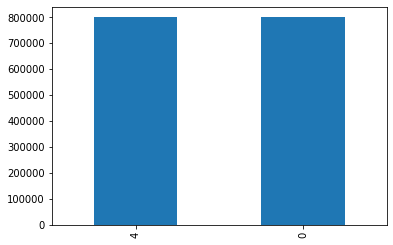

In [ ]:
df['target'].value_counts().plot.bar()

In [ ]:
df['target'].value_counts()

4    800000
0    800000
Name: target, dtype: int64

In [ ]:
df=df.drop("date",axis=1)
df=df.drop("id",axis=1)
df=df.drop("user",axis=1)
df=df.drop("flag",axis=1)
df.head()

,target,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df["text"] = df["text"].str.lower()

In [ ]:
df.text = df.text.str.replace("  "," ")

In [ ]:
df.text=df.text.str.replace('-'," ")

In [ ]:
def remove_url(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

In [ ]:
for i in range(df.shape[0]):
  df.at[i,'text']=remove_url(df.at[i,'text'])

In [ ]:
df["text"]=df["text"].str.replace('\d+','')

In [ ]:
import string
Premove = string.punctuation
def remove_pun(text):
    return text.translate(str.maketrans('', '', Premove))
df["text"] = df["text"].apply(lambda text: remove_pun(text))

In [ ]:
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)

In [ ]:
df[u'text'] = df[u'text'].astype(str)
df[u'text'] = df[u'text'].apply(lambda x:correct_spellings(x))

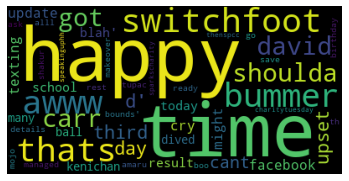

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
real = df['text'].values 
wordcloud = WordCloud().generate(str(real))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

In [ ]:
x=df['text']
y=df['target']

In [ ]:
x

0          switchfoot    awww thats a bummer you shoulda ...
1          is upset that he cant update his facebook by t...
2          kenichan i dived many times for the ball manag...
3            my whole body feels itchy and like its on fire 
4          nationwideclass no its not behaving at all im ...
                                 ...                        
1599995    just woke up having no school is the best feel...
1599996    thewdbcom   very cool to hear old walt intervi...
1599997    are you ready for your mojo makeover ask me fo...
1599998    happy th birthday to my boo of alll time tupac...
1599999    happy charitytuesday thenspcc sparkscharity sp...
Name: text, Length: 1600000, dtype: object

Vectorizer

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
x = tfidf_vectorizer.fit_transform(x)

Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2)

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(bnb, x_train, y_train,cv=5, scoring="accuracy")
cv_scores

array([0.78232422, 0.78257031, 0.78293359, 0.78241016, 0.78075   ])

In [ ]:
cv_scores.mean()

0.7821976562499999

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr=LogisticRegression(max_iter=1500)
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(lgr, x_train, y_train,cv=5, scoring="accuracy")
cv_scores

array([0.80114063, 0.79933984, 0.80120703, 0.80111719, 0.79984375])

In [ ]:
cv_scores.mean()

0.8005296874999999

Classifiers

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred=bnb.predict(x_test)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred))

0.7844125


In [ ]:
from sklearn.neural_network import MLPClassifier
mlpcl = MLPClassifier(max_iter=300).fit(x_train, y_train)
y_prediction=mlpcl.predict(x_test)
print(accuracy_score(y_test,y_prediction))


In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=1500).fit(x_train, y_train)
y_prediction=lgr.predict(x_test)
print(accuracy_score(y_test,y_prediction))

0.800490625


In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC().fit(x_train, y_train)
y_predict=svc.predict(x_test)
print(accuracy_score(y_test,y_predict))

0.793615625


In [ ]:
x1=x
y1=y

In [ ]:
x1.shape

(1600000, 720514)

In [ ]:
from sklearn.model_selection import train_test_split
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1,test_size=.2)

Standardization

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler(with_mean=False)
x_train1=scaler.fit_transform(x_train1)
x_test1 = scaler.fit_transform(x_test1)

Dimensionality Reduction Using PCA

In [ ]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD()
svd.fit_transform(x_train1)

array([[0.42976985, 0.3440653 ],
       [0.33343001, 0.28897579],
       [0.31503414, 0.27376286],
       ...,
       [0.72333999, 0.62428435],
       [0.06976523, 0.05930229],
       [0.61712784, 0.54451988]])

In [ ]:
svd.explained_variance_ratio_

array([2.11008378e-05, 2.02006585e-05])

In [ ]:
svd.n_components

2

In [ ]:
x_train1.shape

(960000, 720514)

In [ ]:
y_train1.shape

(960000,)

In [ ]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression(max_iter=1500)
lgr.fit(x_train1,y_train1)

In [ ]:
lgr.score(x_test1,y_test1)

0.757665625

In [ ]:
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_train1,y_train1)
y_pred=bnb.predict(x_test1)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1,y_pred))

0.7835375


In [ ]:
from sklearn.svm import LinearSVC
svc = LinearSVC(max_iter=1500).fit(x_train1, y_train1)
y_predict=svc.predict(x_test1)

In [ ]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test1,y_predict))

0.693978125
